# Lab 09 XOR - Neural Network 
* XOR 문제를  Neural Network을 활용해 풀어보도록 하겠습니다.

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

print(tf.__version__)

1.12.0


### 강의에 설명할 Data입니다
* x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data 0과 1로 구분하는 예제입니다
* 붉은색과 푸른색으로 0과 1을 표시해 보도록 하겠습니다.

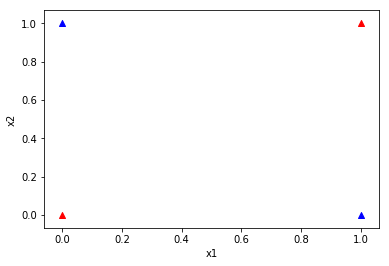

In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

##  Tensorflow Session
### 위 Data를 기준으로 XOR처리를 위한 모델을 만들도록 하겠습니다
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* features,labels는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data)).repeat()

iter = dataset.make_initializable_iterator()
features, labels = iter.get_next()

features = tf.cast(features, tf.float32)
labels = tf.cast(labels, tf.float32)

Neural Network를 통해 XOR해결 
* 위의 Data를 2Layer의 Neural Network를 통해 학습시킨 후 모델을 생성합니다. 

In [4]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [6]:
learning_rate = 0.01

cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1 - labels) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))

In [7]:
EPOCHS = 100001

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(EPOCHS):
        sess.run(iter.initializer)
        _, loss_value = sess.run([train, cost])
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))
    h, c, a = sess.run([hypothesis, predicted, accuracy])
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

Iter: 0, Loss: 0.6969
Iter: 5000, Loss: 0.6942
Iter: 10000, Loss: 0.6935
Iter: 15000, Loss: 0.6928
Iter: 20000, Loss: 0.6916
Iter: 25000, Loss: 0.6883
Iter: 30000, Loss: 0.6787
Iter: 35000, Loss: 0.6521
Iter: 40000, Loss: 0.6021
Iter: 45000, Loss: 0.5186
Iter: 50000, Loss: 0.3224
Iter: 55000, Loss: 0.1633
Iter: 60000, Loss: 0.0988
Iter: 65000, Loss: 0.0689
Iter: 70000, Loss: 0.0523
Iter: 75000, Loss: 0.0419
Iter: 80000, Loss: 0.0349
Iter: 85000, Loss: 0.0298
Iter: 90000, Loss: 0.0259
Iter: 95000, Loss: 0.0230
Iter: 100000, Loss: 0.0206

Hypothesis:  [[0.01998416]
 [0.9809352 ]
 [0.9745661 ]
 [0.01698641]] 
Correct (Y):  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0
